# Assignment 7 - Support Vector Machines (SVM)


## Part 1: Iris Dataset Classification using SVM
In this part, we train SVM models using three different kernels:
- Linear
- Polynomial (degree=3)
- RBF

We evaluate each using:
- Accuracy  
- Precision  
- Recall  
- F1-Score  

We also display the confusion matrix for each kernel.


In [1]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train.shape, X_test.shape


((120, 4), (30, 4))

### Train SVM models with Linear, Polynomial, and RBF kernels


In [2]:
kernels = {
    "Linear": SVC(kernel="linear"),
    "Polynomial (Degree=3)": SVC(kernel="poly", degree=3),
    "RBF": SVC(kernel="rbf")
}

results = {}

def evaluate(model):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "Recall": recall_score(y_test, y_pred, average="macro"),
        "F1-Score": f1_score(y_test, y_pred, average="macro"),
        "Predictions": y_pred
    }

for name, model in kernels.items():
    model.fit(X_train, y_train)
    results[name] = evaluate(model)

results


{'Linear': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0,
  'Predictions': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
         0, 2, 2, 2, 2, 2, 0, 0])},
 'Polynomial (Degree=3)': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0,
  'Predictions': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
         0, 2, 2, 2, 2, 2, 0, 0])},
 'RBF': {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0,
  'Predictions': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
         0, 2, 2, 2, 2, 2, 0, 0])}}

### Confusion Matrices for All Kernels


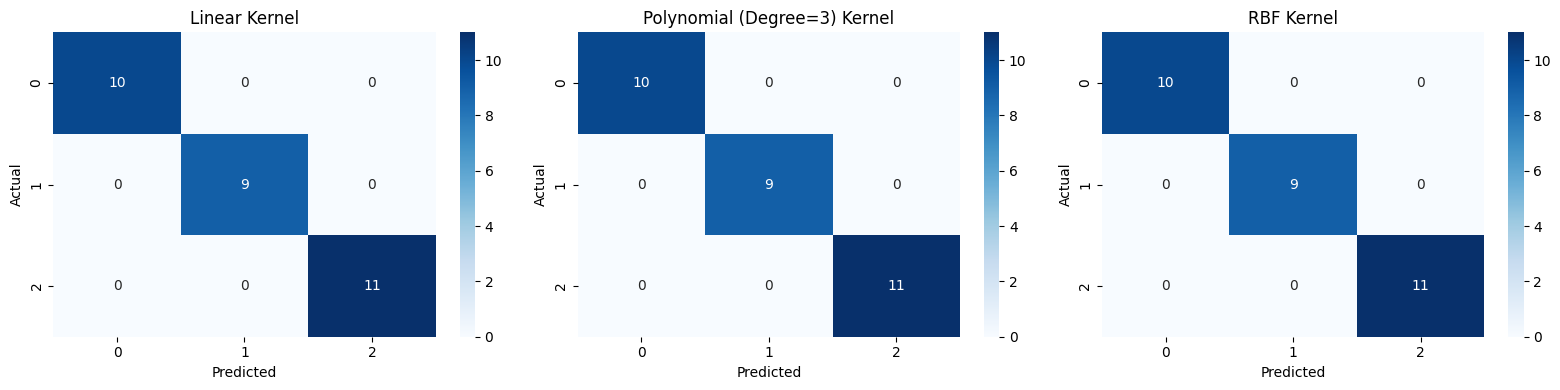

In [3]:
plt.figure(figsize=(16,4))

for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(1,3,i+1)
    cm = confusion_matrix(y_test, metrics["Predictions"])
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"{name} Kernel")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


### Best Performing Kernel


In [4]:
best_kernel = max(results.items(), key=lambda x: x[1]["Accuracy"])
best_kernel


('Linear',
 {'Accuracy': 1.0,
  'Precision': 1.0,
  'Recall': 1.0,
  'F1-Score': 1.0,
  'Predictions': array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
         0, 2, 2, 2, 2, 2, 0, 0])})

## Part 2: Effect of Feature Scaling on SVM (Breast Cancer Dataset)

We train two SVM (RBF kernel) models:
1. Without scaling  
2. With StandardScaler  

We compare:
- Training accuracy  
- Testing accuracy


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# SVM without scaling
svm_no = SVC(kernel="rbf")
svm_no.fit(X_train, y_train)

train_no = svm_no.score(X_train, y_train)
test_no = svm_no.score(X_test, y_test)

# SVM with scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

svm_scaled = SVC(kernel="rbf")
svm_scaled.fit(X_train_s, y_train)

train_scaled = svm_scaled.score(X_train_s, y_train)
test_scaled = svm_scaled.score(X_test_s, y_test)

train_no, test_no, train_scaled, test_scaled


(0.9142857142857143, 0.9473684210526315, 0.989010989010989, 0.9824561403508771)

## Discussion: Effect of Feature Scaling

Feature scaling significantly improves SVM performance, especially with RBF and Polynomial kernels.

### Without Scaling:
- Features with large values dominate distance calculations.
- SVM struggles to find correct decision boundaries.
- Lower accuracy.

### With Scaling:
- All features contribute equally.
- SVM optimizes distance-based kernels properly.
- Higher training & testing accuracy.

**Conclusion:**  
Feature scaling is essential for SVM models using RBF or polynomial kernels.
